# Aula 01

Importar Dados

In [144]:
import pandas as pd
import numpy as np

dados = pd.read_excel("https://github.com/cmattosr/bootcampDS_Mod05/raw/main/dados/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx?raw=true")
dados.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1


In [145]:
def preenche_tabela(dados):
    features_continuas_colunas = dados.iloc[:, 13:-2].columns
    features_continuas = dados.groupby("PATIENT_VISIT_IDENTIFIER", as_index=False)[features_continuas_colunas].fillna(method='bfill').fillna(method='ffill')
    features_categoricas = dados.iloc[:, :13]
    saida = dados.iloc[:, -2:]
    dados_finais = pd.concat([features_categoricas, features_continuas, saida], ignore_index=True,axis=1)
    dados_finais.columns = dados.columns
    return dados_finais

In [146]:
dados_limpos = preenche_tabela(dados)
a_remover = dados_limpos.query("WINDOW=='0-2' and ICU==1")['PATIENT_VISIT_IDENTIFIER'].values
dados_limpos = dados_limpos.query("PATIENT_VISIT_IDENTIFIER not in @a_remover")
dados_limpos = dados_limpos.dropna()
dados_limpos.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1760.000000,1760.000000,1760.000000,1760.00000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,...,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000
mean,192.818182,0.457386,0.380682,0.11250,0.026136,0.101705,0.021591,0.132955,0.049432,0.212500,...,-0.778209,-0.823458,-0.915593,-0.828593,-0.774857,-0.854690,-0.788155,-0.824412,-0.915552,0.201705
std,110.637724,0.498322,0.485692,0.31607,0.159586,0.302345,0.145385,0.339622,0.216829,0.409193,...,0.411909,0.276279,0.247695,0.287696,0.368311,0.240338,0.384405,0.274953,0.248093,0.401387
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,97.750000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,191.500000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
75%,289.250000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.764706,-0.738095,-0.919192,-0.726087,-0.651942,-0.771625,-0.756272,-0.736640,-0.920103,0.000000
max,384.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.333333,1.000000,1.000000,1.000000,1.000000,1.000000,0.329660,1.000000,1.000000


In [147]:
def prepare_window(rows):
    if(np.any(rows["ICU"])):
        rows.loc[rows["WINDOW"]=="0-2", "ICU"] = 1
    return rows.loc[rows["WINDOW"] == "0-2"]

dados_limpos = dados_limpos.groupby("PATIENT_VISIT_IDENTIFIER").apply(prepare_window)
#Transforma a coluna AGE_PERCENTIL em uma coluna com valores categóricos (.astype("category"))
#Transforma as categorias em códigos (.cat.codes)
dados_limpos.AGE_PERCENTIL = dados_limpos.AGE_PERCENTIL.astype("category").cat.codes
dados_limpos.head()

,,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
2,10,2,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,0-2,1
3,15,3,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
4,20,4,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.952381,-0.979798,-1.000000,-0.883669,-0.956805,-0.870968,-0.953536,-0.980333,0-2,0
5,25,5,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.976190,-0.979798,-0.860870,-0.714460,-0.986481,-1.000000,-0.975891,-0.980129,0-2,0


In [148]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

np.random.seed(73246)


x_columns = dados.columns
y = dados_limpos["ICU"]
x = dados_limpos[x_columns].drop(["ICU","WINDOW"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)
modelo = DummyClassifier()
modelo.fit(x_train, y_train)

y_prediction = modelo.predict(x_test)
accuracy_score(y_test, y_prediction)

0.5340909090909091

In [149]:
modelo = LogisticRegression(max_iter=10000)
modelo.fit(x_train, y_train)

y_prediction = modelo.predict(x_test)
accuracy_score(y_test, y_prediction)

0.6818181818181818

## Desafio 01: Transformar a coluna AGE_PERCENTIL em dados categóricos, mas utilizando outro método

In [150]:
desafio01 = pd.read_excel("https://github.com/cmattosr/bootcampDS_Mod05/raw/main/dados/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx?raw=true")

from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
desafio01.AGE_PERCENTIL = label.fit_transform(desafio01.AGE_PERCENTIL) 
desafio01

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384,0,4,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1921,384,0,4,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
1922,384,0,4,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0
1923,384,0,4,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,0


## Desafio 02: Verificar o impacto na mudança nos resultados

# Aula 02

In [151]:
#vamos criar um novo modelo
from sklearn.tree import DecisionTreeClassifier

modelo_arvore = DecisionTreeClassifier()
modelo_arvore.fit(x_train, y_train)
predicao_arvore = modelo_arvore.predict(x_test)
accuracy_score(y_test, predicao_arvore)

0.6477272727272727

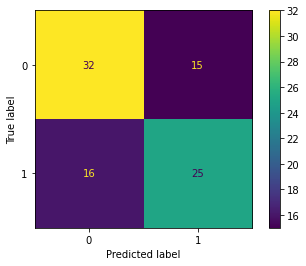

In [152]:
#vamos plotar os valores reais e os valores previstos pelo modelo
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(modelo_arvore, x_test, y_test)

Situações da Matrix de confusão:
- VP (verdadeiro-positivo) = 25
- VN (verdadeiro negativo) = 32
- FP (falso-positivo) = 15
- FN (falso-negativo) = 16

## No nosso caso FN são extremente indesejados porque são pessoas que precisariam de UTI mas não foram consideradas, precisamos de mais métricas para avalização do modelo

In [153]:
VP = 25
VN = 32
FP = 15
FN = 16

In [154]:
#vamos utilizar outra métrica
from sklearn.metrics import classification_report

print(classification_report(y_test, predicao_arvore))

              precision    recall  f1-score   support

           0       0.67      0.68      0.67        47
           1       0.62      0.61      0.62        41

    accuracy                           0.65        88
   macro avg       0.65      0.65      0.65        88
weighted avg       0.65      0.65      0.65        88



In [155]:
#precision: de tudo que foi previsto como positivo, quantos valores são realmente positivos (VP e FP). Utilizado quando quer se evitar falso-positivos
VP/(VP+FP)

0.625

In [156]:
#recall: de tudo que é positivo, quantos valores foram classificados corretamente como positivos (VN e FN). Utilizado quando quer se evitar falso-negativos
VN/(VN+FN)

0.6666666666666666

In [157]:
#f1-score: média harmônica entre precision e recall
#exemplo de média harmônica
p_precision = 0.5
r_recall = 0.5
f1 = 2 * (p_precision * r_recall)/(p_precision + r_recall)
print(f1)

0.5


In [158]:
#mais um exemplo de média harmônica
p_precision = 1.0
r_recall = 0.5
f1 = 2 * (p_precision * r_recall)/(p_precision + r_recall)
print(f1)

0.6666666666666666


## O f1-score fica mais próximo do valor mais baixo, alertando que um dos valores está baixo

## Desafio 03: Pesquisar sobre o f-score

## Desafio 04: Plotar a árvore de decisão

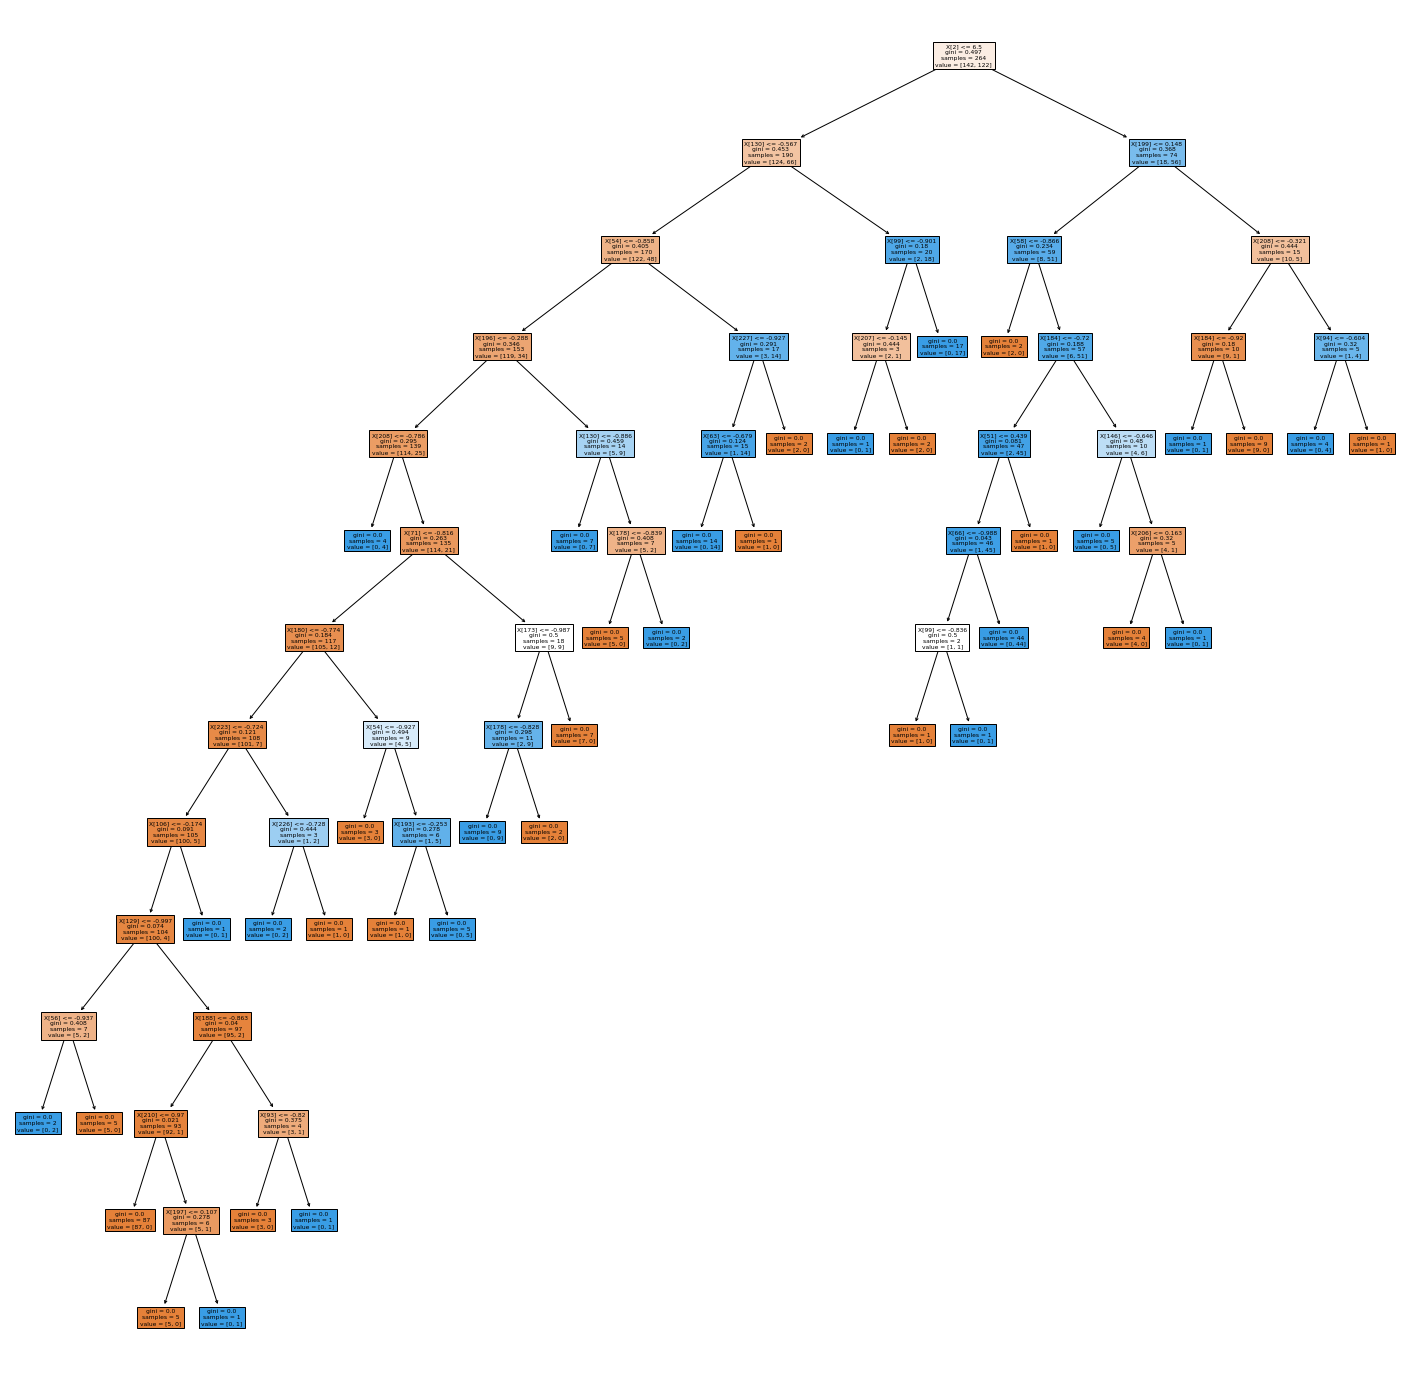

In [159]:
from sklearn import tree

fig = plt.figure(figsize=(25,25))
_ = tree.plot_tree(modelo_arvore, filled=True)

In [160]:
#métrica AUC
#Área sob a curva
#Calcular AUC
from sklearn.metrics import roc_auc_score

proba_arvore = modelo_arvore.predict_proba(x_test)
#retorna uma matriz com duas colunas: a primeira a chance da classe ser 0, e outra com a chance de ser 1
#queremos só a segunda coluna pra calcular o AUC
roc_auc_score(y_test, proba_arvore[:,1])

0.6453035806953815

In [161]:
def roda_modelo(modelo, dados):
    x_columns = dados.columns
    y = dados["ICU"]
    x = dados[x_columns].drop(["ICU","WINDOW"], axis=1)
    x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.15)
    modelo.fit(x_train, y_train)
    predicao = modelo.predict(x_test)
    prob_predict = modelo.predict_proba(x_test)
    auc = roc_auc_score(y_test, prob_predict[:,1])
    print(f"AUC {auc}")
    print("\nClassification report")
    print(classification_report(y_test, predicao))

In [162]:
roda_modelo(modelo_arvore, dados_limpos)

AUC 0.695

Classification report
              precision    recall  f1-score   support

           0       0.70      0.75      0.72        28
           1       0.70      0.64      0.67        25

    accuracy                           0.70        53
   macro avg       0.70      0.70      0.70        53
weighted avg       0.70      0.70      0.70        53



## Desafio 05: Desenvolver uma função que gere a curva ROC (para o AUC)

## Desafio 06: Pensar como diminuir o efeito/impacto da aleatoriedade do modelo, produzindo um modelo mais consistente

In [163]:
#Reduzir aleatoriedade

import numpy as np

def roda_n_modelos(modelo, dados, n):
    x_columns = dados.columns
    y = dados["ICU"]
    x = dados[x_columns].drop(["ICU","WINDOW"], axis=1)
    auc_lista = []
    for _ in range(n):
        x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)
        modelo.fit(x_train, y_train)
        prob_predict = modelo.predict_proba(x_test)
        auc = roc_auc_score(y_test, prob_predict[:,1])
        auc_lista.append(auc)
    auc_medio = np.mean(auc_lista)
    auc_std = np.std(auc_lista)
    print(f"AUC {auc_medio}")
    print(f"Intervalo: {auc_medio - 2 * auc_std} - {auc_medio + 2 * auc_std} ")

In [164]:
roda_n_modelos(modelo_arvore, dados_limpos, 50)

AUC 0.6279449922158796
Intervalo: 0.5332413220014512 - 0.722648662430308 


In [165]:
roda_n_modelos(modelo, dados_limpos, 50)

AUC 0.7536792942397509
Intervalo: 0.6734704687007999 - 0.8338881197787019 


## Desafio 07: Estudar a documentação do sklearn e testar outros modelos

In [166]:
#Cross Validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

#faz o embaralhamento dos dados
cv = StratifiedKFold(n_splits=5, shuffle=True)
#divide os dados de treino e teste a fim de que todos os dados sejam utilizados
cross_validate(modelo, x, y, cv=cv)

{'fit_time': array([0.43499875, 0.34099913, 0.37399912, 0.51000214, 0.39999986]),
 'score_time': array([0.0019989 , 0.00199938, 0.00299907, 0.00199866, 0.00200081]),
 'test_score': array([0.70422535, 0.76056338, 0.71428571, 0.75714286, 0.71428571])}

## Desafio 08: Testar outras splitter classes e observar as diferenças (embaralhamento dos dados)

In [167]:
from sklearn.model_selection import RepeatedStratifiedKFold

#além de embaralhar, ele repete as seleções
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)
cross_validate(modelo, x, y, cv=cv)

{'fit_time': array([0.43200159, 0.45899987, 0.12499952, 0.44799972, 0.41199923,
        0.42299867, 0.40499496, 0.3900013 , 0.36499953, 0.39801836,
        0.12499928, 0.13400102, 0.1900003 , 0.42200184, 0.38800097,
        0.41499877, 0.42699981, 0.3380003 , 0.16099906, 0.40300012,
        0.38998508, 0.15000081, 0.45100021, 0.37300038, 0.47199917,
        0.43599963, 0.51099992, 0.1669991 , 0.25999951, 0.37900019,
        0.41199923, 0.4699986 , 0.41499901, 0.16400123, 0.38999963,
        0.17499852, 0.19600081, 0.43199992, 0.3809998 , 0.12300014,
        0.41599894, 0.13000059, 0.38799977, 0.43199921, 0.36600161,
        0.35899806, 0.39100885, 0.17799973, 0.42899942, 0.13999939]),
 'score_time': array([0.00299025, 0.00200057, 0.00200033, 0.00199914, 0.00199938,
        0.002002  , 0.00200081, 0.00200105, 0.00299978, 0.00198102,
        0.00199914, 0.00300074, 0.00299883, 0.00399899, 0.00199938,
        0.00200129, 0.00199938, 0.00200081, 0.00300026, 0.00301456,
        0.00199986, 

In [168]:
def roda_modelo_cv(modelo, dados, n_splits, n_repeats):
    #garantir a reprodutibilidade da separação de dados
    np.random.seed(1231234)
    #embaralhar os dados antes porque o RepeatedStratifiedKFold não tem shuffle
    dados = dados.sample(frac=1).reset_index(drop=True)
    x_columns = dados.columns
    y = dados["ICU"]
    x = dados[x_columns].drop(["ICU","WINDOW"], axis=1)

    cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats)
    resultados = cross_validate(modelo, x, y, cv=cv, scoring= "roc_auc", return_train_score=True)

    auc_medio = np.mean(resultados["test_score"])
    auc_medio_treino = np.mean(resultados["train_score"])
    auc_std = np.std(resultados["test_score"])

    #print(f"AUC Médio: {auc_medio} Intervalo: {auc_medio - 2 * auc_std} - {auc_medio + 2 * auc_std}")
    print(f"AUC TEST: {auc_medio} - AUC TRAIN: {auc_medio_treino}")
    return auc_medio, auc_medio_treino

In [169]:
roda_modelo_cv(modelo, dados_limpos, 5, 10)

AUC TEST: 0.757490314776499 - AUC TRAIN: 0.86529409928392


(0.757490314776499, 0.86529409928392)

In [170]:
roda_n_modelos(modelo, dados_limpos, 50)

AUC 0.7608303061754023
Intervalo: 0.65474576725167 - 0.8669148450991345 


In [171]:
roda_modelo_cv(modelo_arvore, dados_limpos, 5, 10)

AUC TEST: 0.6279279683391525 - AUC TRAIN: 1.0


(0.6279279683391525, 1.0)

## Níveis das Árvores de Decisão

In [172]:
from sklearn.tree import DecisionTreeClassifier

modelo_arvore = DecisionTreeClassifier(max_depth=3)
roda_modelo_cv(modelo_arvore, dados_limpos, 5, 10)


AUC TEST: 0.6643847795163584 - AUC TRAIN: 0.8243714304989842


(0.6643847795163584, 0.8243714304989842)

In [173]:
modelo_arvore = DecisionTreeClassifier(max_depth=4)
roda_modelo_cv(modelo_arvore, dados_limpos, 5, 10)


AUC TEST: 0.6554932930837536 - AUC TRAIN: 0.8832038893699776


(0.6554932930837536, 0.8832038893699776)

In [174]:
modelo_arvore = DecisionTreeClassifier(max_depth=5)
roda_modelo_cv(modelo_arvore, dados_limpos, 5, 10)


AUC TEST: 0.6475058192163456 - AUC TRAIN: 0.9275331115338461


(0.6475058192163456, 0.9275331115338461)

In [175]:
modelo_arvore = DecisionTreeClassifier(max_depth=6)
roda_modelo_cv(modelo_arvore, dados_limpos, 5, 10)


AUC TEST: 0.6239047951959137 - AUC TRAIN: 0.9567921210944048


(0.6239047951959137, 0.9567921210944048)

In [176]:
#Foi alterada a função roda_modelo_cv para capturar o auc dos dados de treino

teste_lista = []
treino_lista = []
for i in range(1, 15):
    print(i)
    modelo_arvore = DecisionTreeClassifier(max_depth=i)
    teste, treino = roda_modelo_cv(modelo_arvore, dados_limpos, 5, 10)
    teste_lista.append(teste)
    treino_lista.append(treino)

1
AUC TEST: 0.5755830262080263 - AUC TRAIN: 0.6445982993536308
2
AUC TEST: 0.6544700741411268 - AUC TRAIN: 0.75415524801741
3
AUC TEST: 0.6643847795163584 - AUC TRAIN: 0.8243714304989842
4
AUC TEST: 0.6554932930837536 - AUC TRAIN: 0.8832038893699776
5
AUC TEST: 0.6475058192163456 - AUC TRAIN: 0.9275331115338461
6
AUC TEST: 0.6239047951959137 - AUC TRAIN: 0.9567921210944048
7
AUC TEST: 0.6117738776455882 - AUC TRAIN: 0.9745102329260463
8
AUC TEST: 0.5987671815056683 - AUC TRAIN: 0.9855938255169409
9
AUC TEST: 0.5877544694814432 - AUC TRAIN: 0.991376822665679
10
AUC TEST: 0.5917582923832925 - AUC TRAIN: 0.9946888385564852
11
AUC TEST: 0.6009579413444545 - AUC TRAIN: 0.9970452758822465
12
AUC TEST: 0.6147261533363507 - AUC TRAIN: 0.9986297665919551
13
AUC TEST: 0.6212348996723998 - AUC TRAIN: 0.9994661199548005
14
AUC TEST: 0.6256292095025647 - AUC TRAIN: 0.9998695491440995


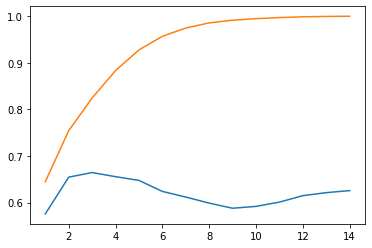

In [177]:
import matplotlib.pyplot as plt

x = range(1, 15)
plt.plot(x, teste_lista)
plt.plot(x, treino_lista)

É possível verificar que os dados de treino (em laranja) estão sempre melhorando, enquanto que os dados de teste (em azul) não evoluem e oscilam. Isso se deve ao fato de ter ocorrido um overfit, ou seja, o modelo se adequou tão bem aos dados de treino que ele não consegue generalizar o modelo para os dados de teste

## Desafio 09: Deixar o gráfico de AUC bonitão

## Desafio 10: Fazer o plot das médias de AUC variando o max_depth da Decision Tree de uma outra base de dados e verificar o resultado (criando um sobreajuste ou overfit) (dica: base do Titanic no kaggle)

## Desafio 11: Estudar um pouco mais sobre overfit e underfit

1
AUC TEST: 0.7754785968683994 - AUC TRAIN: 0.8549995635150238
2
AUC TEST: 0.7868632672744513 - AUC TRAIN: 0.8976687127896622
3
AUC TEST: 0.7931550390103022 - AUC TRAIN: 0.9403124842531797
4
AUC TEST: 0.7983565832578993 - AUC TRAIN: 0.9709123570096604
5
AUC TEST: 0.7990938591103065 - AUC TRAIN: 0.98788117359786
6
AUC TEST: 0.8004527808310704 - AUC TRAIN: 0.9959760554693325
7
AUC TEST: 0.7994808369972844 - AUC TRAIN: 0.9990287365273224
8
AUC TEST: 0.7977776116427432 - AUC TRAIN: 0.9998630161707951
9
AUC TEST: 0.7963008103797579 - AUC TRAIN: 0.9999847540078024
10
AUC TEST: 0.7927381904931247 - AUC TRAIN: 1.0
11
AUC TEST: 0.7928442699577567 - AUC TRAIN: 1.0
12
AUC TEST: 0.7923345025647657 - AUC TRAIN: 1.0
13
AUC TEST: 0.7939161507500323 - AUC TRAIN: 1.0
14
AUC TEST: 0.7939437314108367 - AUC TRAIN: 1.0


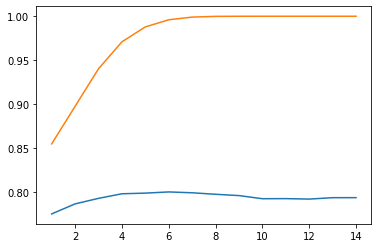

In [178]:
from sklearn.ensemble import RandomForestClassifier

teste_lista = []
treino_lista = []
for i in range(1, 15):
    print(i)
    modelo_arvore = RandomForestClassifier(max_depth=i)
    teste, treino = roda_modelo_cv(modelo_arvore, dados_limpos, 5, 10)
    teste_lista.append(teste)
    treino_lista.append(treino)

x = range(1, 15)
plt.plot(x, teste_lista)
plt.plot(x, treino_lista)

In [179]:
#mudando o parâmetro n_estimators do Random Forest, que é o número de árvores de decisão que serão utilizadas no modelo

modelo_arvore = RandomForestClassifier(n_estimators=10)
teste, treino = roda_modelo_cv(modelo_arvore, dados_limpos, 5, 10)

AUC TEST: 0.7428159147484805 - AUC TRAIN: 0.999444041300827


In [180]:
modelo_arvore = RandomForestClassifier(n_estimators=100)
teste, treino = roda_modelo_cv(modelo_arvore, dados_limpos, 5, 10)

AUC TEST: 0.7939557739557739 - AUC TRAIN: 1.0


In [181]:
modelo_arvore = RandomForestClassifier(n_estimators=200)
teste, treino = roda_modelo_cv(modelo_arvore, dados_limpos, 5, 10)

AUC TEST: 0.7950421219664641 - AUC TRAIN: 1.0


## Desafio 12: Escolher um modelo de ML, mostrado aqui ou não, estudar os hiperparâmetros do modelo e testar a mudança destes 

## Desafio 13: Pesquisar como salvar o modelo treinado

## Correlação

In [182]:
#Gerar uma matriz de correlação
dados_limpos.corr()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
PATIENT_VISIT_IDENTIFIER,1.000000,-0.017361,0.031159,0.071961,0.058683,0.022828,0.045907,-0.026074,-0.005678,0.021964,...,-0.046410,-0.045353,-0.018859,-0.051978,-0.080779,-0.059587,-0.030755,-0.045456,-0.015996,-0.041382
AGE_ABOVE65,-0.017361,1.000000,0.874773,0.031830,0.280326,0.051308,0.165905,0.032608,0.314536,0.003930,...,-0.005558,0.028262,-0.030515,0.009262,-0.039387,0.002790,-0.021190,0.029317,-0.031404,0.291010
AGE_PERCENTIL,0.031159,0.874773,1.000000,0.056211,0.294671,0.058015,0.134016,0.014480,0.334920,-0.035015,...,-0.007992,-0.006030,-0.040314,0.013580,-0.062474,-0.037260,-0.040807,-0.004185,-0.039724,0.351071
GENDER,0.071961,0.031830,0.056211,1.000000,0.036528,-0.001784,-0.064757,-0.069768,-0.019812,-0.020573,...,-0.016903,-0.012423,0.028744,-0.011922,-0.021507,0.074222,-0.014353,-0.011416,0.029412,-0.117938
DISEASE GROUPING 1,0.058683,0.280326,0.294671,0.036528,1.000000,0.196347,0.278271,0.017529,0.340370,0.202849,...,-0.028964,-0.041099,-0.056287,-0.050070,-0.054745,0.093512,-0.052568,-0.039692,-0.056984,0.071825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HEART_RATE_DIFF_REL,-0.059587,0.002790,-0.037260,0.074222,0.093512,0.005102,-0.011633,-0.034997,-0.045113,0.018891,...,0.320962,0.362021,0.360456,0.373031,0.418624,1.000000,0.343703,0.364743,0.350001,-0.004147
RESPIRATORY_RATE_DIFF_REL,-0.030755,-0.021190,-0.040807,-0.014353,-0.052568,-0.003487,-0.008895,0.023616,-0.058564,-0.049022,...,0.961739,0.316620,0.349747,0.349866,0.421228,0.343703,1.000000,0.313204,0.342852,0.077798
TEMPERATURE_DIFF_REL,-0.045456,0.029317,-0.004185,-0.011416,-0.039692,-0.024682,0.003183,0.034426,-0.080693,0.005691,...,0.282514,0.999444,0.503937,0.356403,0.422108,0.364743,0.313204,1.000000,0.493818,-0.008514
OXYGEN_SATURATION_DIFF_REL,-0.015996,-0.031404,-0.039724,0.029412,-0.056984,0.099019,0.006110,-0.025072,-0.097014,-0.033472,...,0.325973,0.497784,0.998889,0.521889,0.479010,0.350001,0.342852,0.493818,1.000000,0.026663


In [183]:
#remover os dados categóricos

#ver os tipos de dados do dataframe
dados_limpos.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 352 entries, (0, 0) to (384, 1920)
Columns: 231 entries, PATIENT_VISIT_IDENTIFIER to ICU
dtypes: float64(225), int64(4), int8(1), object(1)
memory usage: 656.0+ KB


In [184]:
#vamos identificar quais são as colunas com dados que não os float(64)
dados_limpos.select_dtypes(exclude="float64")

,,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,WINDOW,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,
0,0,0,1,5,0,0-2,1
2,10,2,0,0,0,0-2,1
3,15,3,0,3,1,0-2,0
4,20,4,0,0,0,0-2,0
5,25,5,0,0,0,0-2,0
...,...,...,...,...,...,...,...
380,1900,380,0,3,1,0-2,1
381,1905,381,1,9,0,0-2,0
382,1910,382,0,4,0,0-2,1


In [185]:
#vamos remover as colunas acima da correlação
dados_limpos.iloc[:, 4:-2].corr()

,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,...,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL
DISEASE GROUPING 1,1.000000,0.196347,0.278271,0.017529,0.340370,0.202849,0.489245,0.176224,0.153793,-0.009174,...,0.129220,-0.028964,-0.041099,-0.056287,-0.050070,-0.054745,0.093512,-0.052568,-0.039692,-0.056984
DISEASE GROUPING 2,0.196347,1.000000,0.084392,0.114818,0.112878,-0.032173,0.118516,0.139947,0.068432,0.032245,...,0.014222,-0.001618,-0.024705,0.085122,0.070419,0.016917,0.005102,-0.003487,-0.024682,0.099019
DISEASE GROUPING 3,0.278271,0.084392,1.000000,0.308875,0.293259,0.275760,0.471039,0.075599,0.141903,-0.035719,...,-0.015035,-0.013900,0.000746,0.005011,-0.004373,0.020683,-0.011633,-0.008895,0.003183,0.006110
DISEASE GROUPING 4,0.017529,0.114818,0.308875,1.000000,0.128287,0.171438,0.136472,0.103100,0.063919,-0.049593,...,-0.023554,0.016131,0.032550,-0.026121,-0.043714,-0.029596,-0.034997,0.023616,0.034426,-0.025072
DISEASE GROUPING 5,0.340370,0.112878,0.293259,0.128287,1.000000,0.129836,0.459169,0.108849,0.149025,-0.082353,...,0.011404,-0.045482,-0.081749,-0.098081,-0.017232,-0.059434,-0.045113,-0.058564,-0.080693,-0.097014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BLOODPRESSURE_SISTOLIC_DIFF_REL,-0.054745,0.016917,0.020683,-0.029596,-0.059434,0.003571,-0.009490,-0.028020,0.040651,0.056603,...,0.371623,0.366943,0.425505,0.483904,0.779557,1.000000,0.418624,0.421228,0.422108,0.479010
HEART_RATE_DIFF_REL,0.093512,0.005102,-0.011633,-0.034997,-0.045113,0.018891,0.073639,-0.015522,0.064229,0.046781,...,0.949914,0.320962,0.362021,0.360456,0.373031,0.418624,1.000000,0.343703,0.364743,0.350001
RESPIRATORY_RATE_DIFF_REL,-0.052568,-0.003487,-0.008895,0.023616,-0.058564,-0.049022,-0.045665,0.019384,0.071270,0.029099,...,0.293907,0.961739,0.316620,0.349747,0.349866,0.421228,0.343703,1.000000,0.313204,0.342852
TEMPERATURE_DIFF_REL,-0.039692,-0.024682,0.003183,0.034426,-0.080693,0.005691,0.031264,0.008243,-0.018162,0.061337,...,0.298203,0.282514,0.999444,0.503937,0.356403,0.422108,0.364743,0.313204,1.000000,0.493818


In [187]:
#vamos remover as colunas com alto valor de correlação

#definir o valor aceitável de correlação
alta_corr = 0.95

#transformar os valores de correlação em valores absolutos
matrix_corr = dados_limpos.iloc[:, 4:-2].corr().abs()

#achar se há valores acima do valor definido de correlação na coluna DISEASE GROUPING 1
any(matrix_corr["DISEASE GROUPING 1"] > alta_corr)

True

In [188]:
#vamos pegar as colunas a seremn removidas
excluir = [coluna for coluna in matrix_corr.columns if any(matrix_corr[coluna] > alta_corr)]

In [190]:
#colunas a excluir
print(len(excluir))
excluir

189


['DISEASE GROUPING 1',
 'DISEASE GROUPING 2',
 'DISEASE GROUPING 3',
 'DISEASE GROUPING 4',
 'DISEASE GROUPING 5',
 'DISEASE GROUPING 6',
 'HTN',
 'IMMUNOCOMPROMISED',
 'OTHER',
 'ALBUMIN_MEDIAN',
 'ALBUMIN_MEAN',
 'ALBUMIN_MIN',
 'ALBUMIN_MAX',
 'BE_ARTERIAL_MEDIAN',
 'BE_ARTERIAL_MEAN',
 'BE_ARTERIAL_MIN',
 'BE_ARTERIAL_MAX',
 'BE_VENOUS_MEDIAN',
 'BE_VENOUS_MEAN',
 'BE_VENOUS_MIN',
 'BE_VENOUS_MAX',
 'BIC_ARTERIAL_MEDIAN',
 'BIC_ARTERIAL_MEAN',
 'BIC_ARTERIAL_MIN',
 'BIC_ARTERIAL_MAX',
 'BIC_VENOUS_MEDIAN',
 'BIC_VENOUS_MEAN',
 'BIC_VENOUS_MIN',
 'BIC_VENOUS_MAX',
 'BILLIRUBIN_MEDIAN',
 'BILLIRUBIN_MEAN',
 'BILLIRUBIN_MIN',
 'BILLIRUBIN_MAX',
 'BLAST_MEDIAN',
 'BLAST_MEAN',
 'BLAST_MIN',
 'BLAST_MAX',
 'CALCIUM_MEDIAN',
 'CALCIUM_MEAN',
 'CALCIUM_MIN',
 'CALCIUM_MAX',
 'CREATININ_MEDIAN',
 'CREATININ_MEAN',
 'CREATININ_MIN',
 'CREATININ_MAX',
 'FFA_MEDIAN',
 'FFA_MEAN',
 'FFA_MIN',
 'FFA_MAX',
 'GGT_MEDIAN',
 'GGT_MEAN',
 'GGT_MIN',
 'GGT_MAX',
 'GLUCOSE_MEDIAN',
 'GLUCOSE_MEAN',
 '

In [192]:
#a matrix_corr tem um valor igual a 1 na diagonal, pois é a correlação de uma coluna com ela mesmo, e isso precisa ser tratado
#na matrix_corr o valor 1 corta diagonalmente, e os valores acima e abaixo da diagonal são iguais (espelhados)
#no pandas há uma função "where" que substitui os valores onde a condição é falsa

#vamos criar uma matrix com o mesmo formato de matrix_corr

#ver o formato da matrix_corr
matrix_corr.shape


(225, 225)

In [195]:
#criar uma matrix de mesmo formato somente com valores 1 que serão transformados em True
np.ones(matrix_corr.shape).astype(bool)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [202]:
#vamos pegar o triângulo superior a diagonal e apagar a diagonal, e transformar em dados booleanos
matrix_corr.where(np.triu(np.ones(matrix_corr.shape), k=1).astype(bool))

,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,...,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL
DISEASE GROUPING 1,NaN,0.196347,0.278271,0.017529,0.340370,0.202849,0.489245,0.176224,0.153793,0.009174,...,0.129220,0.028964,0.041099,0.056287,0.050070,0.054745,0.093512,0.052568,0.039692,0.056984
DISEASE GROUPING 2,NaN,NaN,0.084392,0.114818,0.112878,0.032173,0.118516,0.139947,0.068432,0.032245,...,0.014222,0.001618,0.024705,0.085122,0.070419,0.016917,0.005102,0.003487,0.024682,0.099019
DISEASE GROUPING 3,NaN,NaN,NaN,0.308875,0.293259,0.275760,0.471039,0.075599,0.141903,0.035719,...,0.015035,0.013900,0.000746,0.005011,0.004373,0.020683,0.011633,0.008895,0.003183,0.006110
DISEASE GROUPING 4,NaN,NaN,NaN,NaN,0.128287,0.171438,0.136472,0.103100,0.063919,0.049593,...,0.023554,0.016131,0.032550,0.026121,0.043714,0.029596,0.034997,0.023616,0.034426,0.025072
DISEASE GROUPING 5,NaN,NaN,NaN,NaN,NaN,0.129836,0.459169,0.108849,0.149025,0.082353,...,0.011404,0.045482,0.081749,0.098081,0.017232,0.059434,0.045113,0.058564,0.080693,0.097014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BLOODPRESSURE_SISTOLIC_DIFF_REL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.418624,0.421228,0.422108,0.479010
HEART_RATE_DIFF_REL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.343703,0.364743,0.350001
RESPIRATORY_RATE_DIFF_REL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.313204,0.342852
TEMPERATURE_DIFF_REL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.493818


In [203]:
#vamos pegar o triângulo superior a diagonal e apagar a diagonal, e transformar em dados booleanos
matrix_upper = matrix_corr.where(np.triu(np.ones(matrix_corr.shape), k=1).astype(bool))
excluir = [coluna for coluna in matrix_upper.columns if any(matrix_upper[coluna] > alta_corr)]
print(len(excluir))
print(excluir)

131
['ALBUMIN_MEAN', 'ALBUMIN_MIN', 'ALBUMIN_MAX', 'BE_ARTERIAL_MEAN', 'BE_ARTERIAL_MIN', 'BE_ARTERIAL_MAX', 'BE_VENOUS_MEAN', 'BE_VENOUS_MIN', 'BE_VENOUS_MAX', 'BIC_ARTERIAL_MEAN', 'BIC_ARTERIAL_MIN', 'BIC_ARTERIAL_MAX', 'BIC_VENOUS_MEAN', 'BIC_VENOUS_MIN', 'BIC_VENOUS_MAX', 'BILLIRUBIN_MEAN', 'BILLIRUBIN_MIN', 'BILLIRUBIN_MAX', 'BLAST_MEAN', 'BLAST_MIN', 'BLAST_MAX', 'CALCIUM_MEAN', 'CALCIUM_MIN', 'CALCIUM_MAX', 'CREATININ_MEAN', 'CREATININ_MIN', 'CREATININ_MAX', 'FFA_MEAN', 'FFA_MIN', 'FFA_MAX', 'GGT_MEAN', 'GGT_MIN', 'GGT_MAX', 'GLUCOSE_MEAN', 'GLUCOSE_MIN', 'GLUCOSE_MAX', 'HEMATOCRITE_MEAN', 'HEMATOCRITE_MIN', 'HEMATOCRITE_MAX', 'HEMOGLOBIN_MEDIAN', 'HEMOGLOBIN_MEAN', 'HEMOGLOBIN_MIN', 'HEMOGLOBIN_MAX', 'INR_MEAN', 'INR_MIN', 'INR_MAX', 'LACTATE_MEAN', 'LACTATE_MIN', 'LACTATE_MAX', 'LEUKOCYTES_MEAN', 'LEUKOCYTES_MIN', 'LEUKOCYTES_MAX', 'LINFOCITOS_MEAN', 'LINFOCITOS_MIN', 'LINFOCITOS_MAX', 'NEUTROPHILES_MEDIAN', 'NEUTROPHILES_MEAN', 'NEUTROPHILES_MIN', 'NEUTROPHILES_MAX', 'P02_ART

In [204]:
#função para remover as colunas
def remove_corr_var(dados, valor_corte):
    matrix_corr = dados.iloc[:, 4:-2].corr().abs()
    matrix_upper = matrix_corr.where(np.triu(np.ones(matrix_corr.shape), k=1).astype(bool))
    excluir = [coluna for coluna in matrix_upper.columns if any(matrix_upper[coluna] > valor_corte)]
    return dados.drop(excluir, axis=1)

In [205]:
dados_limpos_sem_corr = remove_corr_var(dados_limpos, 0.95)

In [206]:
dados_limpos_sem_corr

,,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,HEART_RATE_DIFF_REL,WINDOW,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.247863,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
2,10,2,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.435897,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,-0.747001,0-2,1
3,15,3,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.299145,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
4,20,4,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.076923,-1.000000,-0.877301,-0.923664,-0.882353,-0.952381,-0.979798,-0.956805,0-2,0
5,25,5,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.247863,-0.826087,-0.754601,-0.984733,-1.000000,-0.976190,-0.979798,-0.986481,0-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,1900,380,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.418803,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
381,1905,381,1,9,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.589744,-1.000000,-1.000000,-1.000000,-1.000000,-0.619048,-1.000000,-1.000000,0-2,0
382,1910,382,0,4,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.299145,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1


In [207]:
roda_modelo_cv(modelo_arvore, dados_limpos, 5, 10)

AUC TEST: 0.7950421219664641 - AUC TRAIN: 1.0


(0.7950421219664641, 1.0)

In [208]:
roda_modelo_cv(modelo_arvore, dados_limpos_sem_corr, 5, 10)

AUC TEST: 0.8042220502500108 - AUC TRAIN: 1.0


(0.8042220502500108, 1.0)

## Desafio 14: Ler no sklearn sobre feature selection e feature importance

## Desafio 15: Plotar também a matriz de confusão

## Desafio 16: Mesmo que o Desafio12: Escolha um modelo de ML, estude os hiperparâmetros desse modelo e teste vásrios hiperparâmetros, com as bases de dados alteradas